In [194]:
import numpy as np
from igraph import Graph

### Create graph

In [195]:
graph = Graph.Erdos_Renyi(n=100, m=200)

In [196]:
# Adjacency matrix
matrix = graph.get_adjacency()

In [197]:
# Adjacency list
def adj_list_from_graph(graph):
    adj_list = graph.get_edgelist()
    _list = {}
    for i in adj_list:
        if i[0] not in _list.keys():
            _list.update({i[0]:[]})
        _list[i[0]].append(i[1])
        if i[1] not in _list.keys():
            _list.update({i[1]:[]})
        _list[i[1]].append(i[0])
    return _list

In [198]:
adj_list = adj_list_from_graph(graph)

In [199]:
adj_list

{2: [15, 23, 27, 32, 43, 58, 93],
 15: [2, 3, 9, 17, 55, 67, 84],
 3: [15, 53, 77, 98],
 9: [15, 97],
 17: [15, 38, 56],
 8: [20, 59],
 20: [8, 81],
 0: [22, 59, 60, 73, 86],
 22: [0, 5, 46, 63, 65, 66, 68],
 5: [22, 31, 58, 61, 95],
 23: [2, 59],
 27: [2, 43, 47, 63, 73],
 6: [29, 36, 77, 98],
 29: [6, 39, 43, 45, 47],
 14: [30, 37, 52, 67, 81, 97],
 30: [14, 65, 68, 71, 73, 76, 89],
 31: [5, 26, 60],
 26: [31, 45, 66],
 32: [2, 25, 76, 77],
 25: [32, 36],
 4: [33, 40, 45, 57, 64, 75, 79, 97],
 33: [4, 82, 88],
 11: [34, 36, 46, 91],
 34: [11, 38, 67],
 36: [6, 11, 25, 37, 39],
 37: [14, 35, 36, 45],
 35: [37],
 12: [38, 51, 69, 87],
 38: [12, 17, 34, 47, 61, 90],
 28: [39, 47, 54, 85],
 39: [28, 29, 36, 55],
 40: [4, 44, 68],
 21: [41],
 41: [21, 63, 93],
 13: [42, 48, 72, 82],
 42: [13, 84],
 43: [2, 27, 29, 63, 93],
 44: [40, 49, 58, 69, 73],
 45: [4, 26, 29, 37, 46, 67],
 7: [46, 76, 83, 97],
 46: [7, 11, 22, 45, 59, 62, 74, 97, 99],
 47: [27, 28, 29, 38, 67, 89, 95, 98],
 48: [13

### Visualisation

In [284]:
adj_list[0]

[22, 59, 60, 73, 86]

In [290]:
adj_list[1]

[68, 74]

In [289]:
for i in matrix[1]:
    print(i, end=', ')

0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [200]:
import matplotlib.pyplot as plt
from igraph import plot

In [201]:
layout = graph.layout("kk")

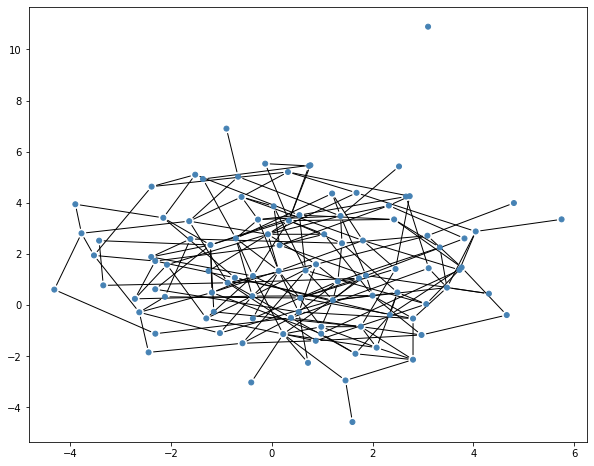

In [202]:
fig, ax = plt.subplots(figsize = (10,8))
plot(graph, layout=layout, target=ax)

### Find components with DFS

In [203]:
def dfs(visited, graph, node):
    if node not in visited:
        visited.append(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)
            

In [204]:
import random

In [293]:
def connected_components(adj_list):
    adj_list = adj_list.copy() # Copy global list
    components = {}
    visited = []
    i = 0
    while len(adj_list) != 0:
        Vertex = list(set(adj_list.keys()) - (set(visited)))[0]
        dfs(visited, adj_list, Vertex)
        components[i] = visited
        for v in visited:
            del adj_list[v]
        visited = []
        i += 1
    for i in components:
        print(f'Vertex {i}: ')
        for j in find_result[i]:
            print(j, end = ', ')
    return components     

In [294]:
find_result = connected_components(adj_list)

Vertex 0: 
0, 22, 5, 31, 26, 45, 4, 33, 82, 13, 42, 84, 15, 2, 23, 59, 8, 20, 81, 14, 30, 65, 10, 71, 85, 28, 39, 29, 6, 36, 11, 34, 38, 12, 51, 69, 44, 40, 68, 1, 74, 46, 7, 76, 32, 25, 77, 3, 53, 60, 48, 92, 19, 49, 18, 83, 64, 63, 27, 43, 93, 41, 21, 55, 86, 61, 52, 16, 50, 73, 57, 91, 24, 54, 72, 56, 17, 98, 47, 67, 95, 94, 75, 80, 58, 96, 89, 97, 9, 87, 78, 90, 62, 99, 37, 35, 66, 88, 79, 

Not connected node

In [271]:
set(np.arange(0,99)) - set(sorted(adj_list))

{70}

### Shortest path with BFS

In [229]:
def BFS_SP(graph, start, goal):
    explored = []
     
    # Queue for traversing the
    # graph in the BFS
    queue = [[start]]
     
    # If the desired node is
    # reached
    if start == goal:
        print("Same Node")
        return
     
    # Loop to traverse the graph
    # with the help of the queue
    while queue:
        path = queue.pop(0)
        node = path[-1]
         
        # Condition to check if the
        # current node is not visited
        if node not in explored:
            neighbours = graph[node]
             
            # Loop to iterate over the
            # neighbours of the node
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                 
                # Condition to check if the
                # neighbour node is the goal
                if neighbour == goal:
                    print("Shortest path = ", *new_path)
                    return
            explored.append(node)
 
    # Condition when the nodes
    # are not connected
    print("The pair of nodes has no connection")
    return

In [233]:
BFS_SP(adj_list, 1, 95)

Shortest path =  1 68 22 5 95
